<img width="400" src="https://nomeroff.net.ua/images/logo/nomeroff_net.svg" alt="Nomeroff Net. Automatic numberplate recognition system" align="left"/>

## The example demonstrates license plate number detection.

In [6]:
import os
import sys
import cv2
import matplotlib.pyplot as plt

current_dir = os.path.dirname("./")
nomeroff_net_dir = os.path.join(current_dir, "../../../")
sys.path.append(nomeroff_net_dir)

from nomeroff_net import pipeline
from nomeroff_net.tools import unzip

from nomeroff_net.pipes.number_plate_localizators.yolo_kp_detector import Detector

In [7]:
number_plate_detection_and_reading = pipeline("number_plate_detection_and_reading", 
                                              number_plate_localization_detector=Detector,
                                              image_loader="opencv")

WARNING ⚠️ Python>=3.10 is required, but Python==3.9.18 is currently installed 


/home/dmitro/.local/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/dmitro/.local/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B2_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/home/dmitro/.local/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DE

In [8]:
result = number_plate_detection_and_reading([
    os.path.join(nomeroff_net_dir, './data/examples/oneline_images/example1.jpeg'),
    os.path.join(nomeroff_net_dir, './data/examples/oneline_images/example2.jpeg'),
])

/mnt/var/www/projects_computer_vision/nomeroff-net/tutorials/ju/inference/./../../../nomeroff_net/nnmodels/numberplate_options_model.py:136: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x1 = functional.softmax(x1)
/mnt/var/www/projects_computer_vision/nomeroff-net/tutorials/ju/inference/./../../../nomeroff_net/nnmodels/numberplate_options_model.py:137: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x2 = functional.softmax(x2)
/mnt/var/www/projects_computer_vision/nomeroff-net/tutorials/ju/inference/./../../../nomeroff_net/pipes/number_plate_text_readers/base/ocr.py:261: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  pred_text

In [9]:
(images, images_bboxs, 
 images_points, images_zones, region_ids, 
 region_names, count_lines, 
 confidences, texts) = unzip(result)

['AC4921CB']


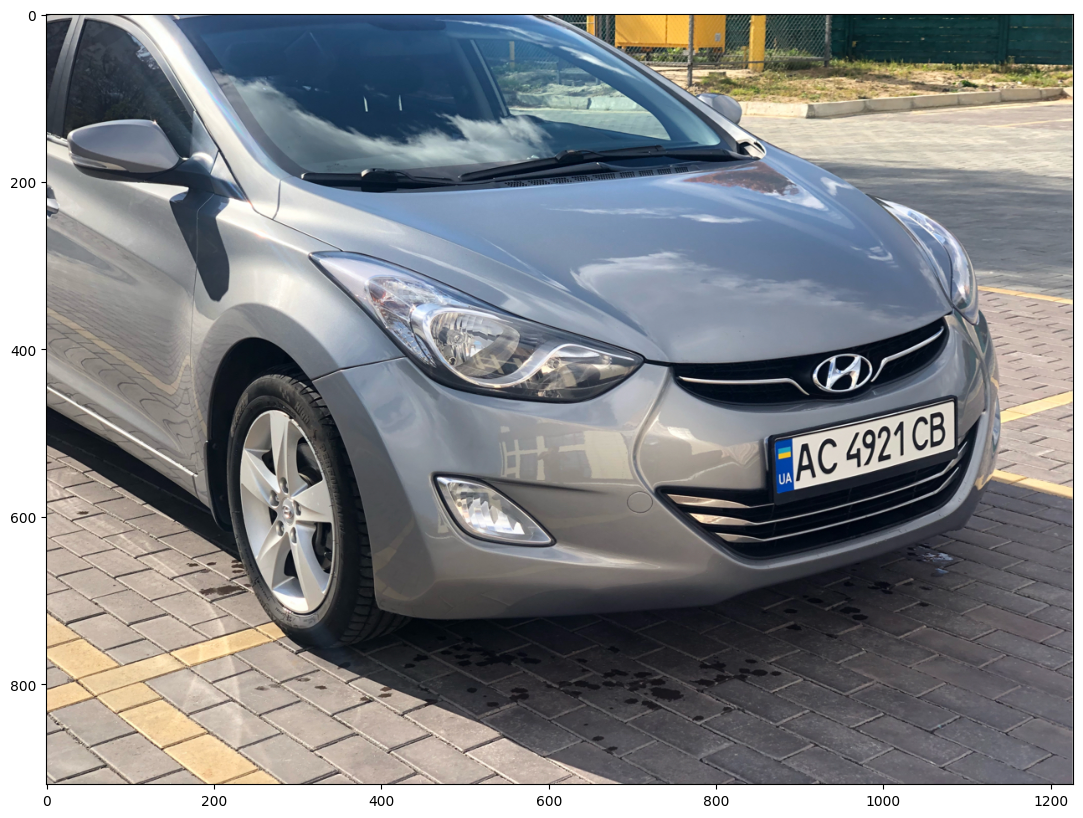

['RP70012', 'JJF509']


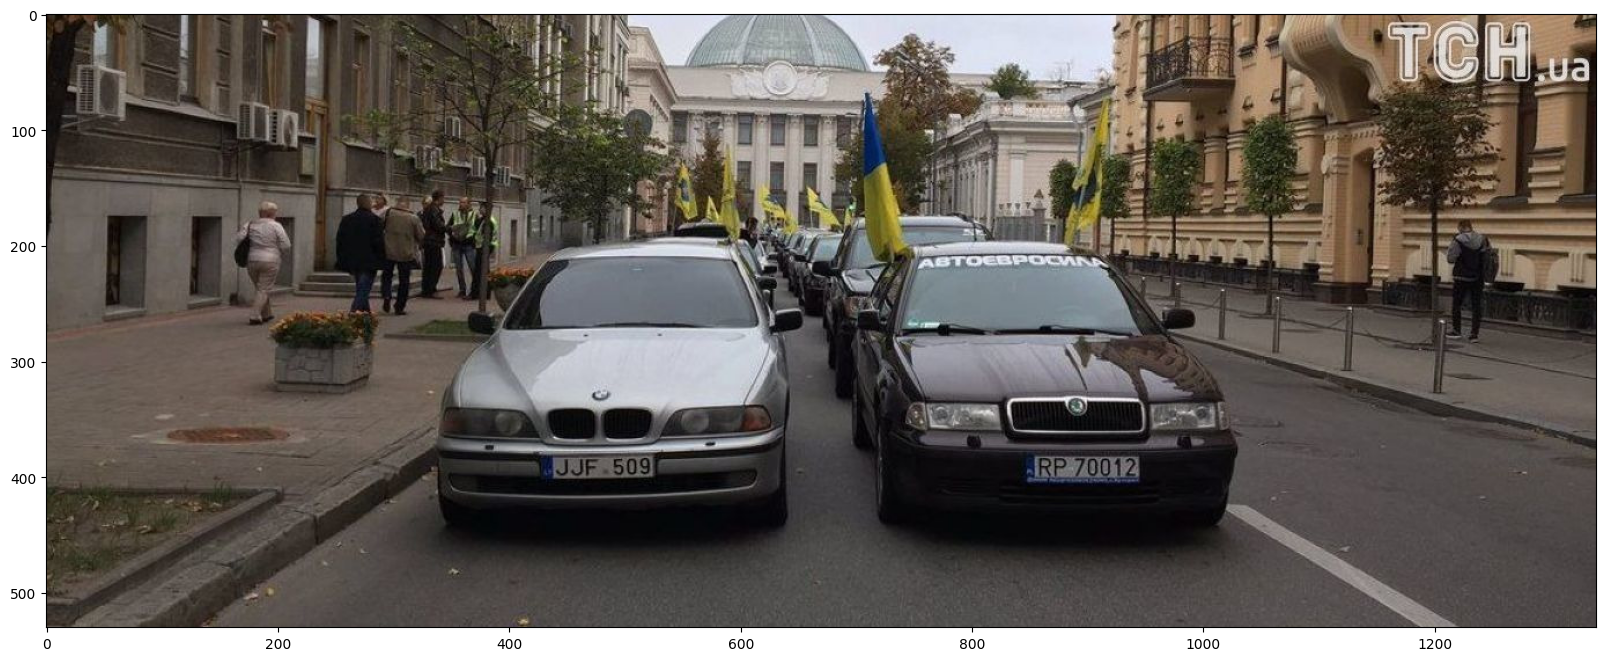

In [10]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

for img, text in zip(images, texts):
    print(text)
    plt.imshow(img)
    plt.show()